# 准备数据

In [13]:
# 过滤Alphalens的warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [15]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [16]:
# 设置任务参数
name = "300_lgb"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [17]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [18]:
# 加载模块
from functools import partial

from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import (
    AlphaDataset,
    process_drop_na,
    process_cs_norm
)
from vnpy.alpha.dataset.datasets.alpha_158 import Alpha158

In [19]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(component_symbols, interval, start, end, extended_days)

In [20]:
df

shape: (2_668_723, 10)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬────────────┬──────────┬───────────┐
│ datetime   ┆ open     ┆ high     ┆ low      ┆ … ┆ turnover   ┆ open_inter ┆ vwap     ┆ vt_symbol │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ est        ┆ ---      ┆ ---       │
│ datetime[μ ┆ f32      ┆ f32      ┆ f32      ┆   ┆ f32        ┆ ---        ┆ f32      ┆ str       │
│ s]         ┆          ┆          ┆          ┆   ┆            ┆ f32        ┆          ┆           │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪════════════╪══════════╪═══════════╡
│ 2007-09-24 ┆ 1.027394 ┆ 1.047945 ┆ 0.994512 ┆ … ┆ 4.8195248e ┆ 0.0        ┆ 9.196457 ┆ 600267.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆            ┆          ┆ E         │
│ 2007-09-25 ┆ 1.002732 ┆ 1.04109  ┆ 0.989718 ┆ … ┆ 4.5153288e ┆ 0.0        ┆ 9.227656 ┆ 600267.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆            ┆          ┆ E         │
│ 2007-09-26 ┆ 1.013697 ┆ 1.071228 ┆ 1.013697 ┆ … ┆ 9.2610144e ┆ 0.0        ┆ 9.626784 ┆ 600267.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆            ┆          ┆ E         │
│ 2007-09-27 ┆ 1.063008 ┆ 1.064374 ┆ 1.013697 ┆ … ┆ 4.399958e7 ┆ 0.0        ┆ 9.366755 ┆ 600267.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆            ┆          ┆ E         │
│ 2007-09-28 ┆ 1.04109  ┆ 1.065752 ┆ 1.028077 ┆ … ┆ 4.8180196e ┆ 0.0        ┆ 9.538811 ┆ 600267.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆            ┆          ┆ E         │
│ …          ┆ …        ┆ …        ┆ …        ┆ … ┆ …          ┆ …          ┆ …        ┆ …         │
│ 2024-01-04 ┆ 0.224558 ┆ 0.226065 ┆ 0.219283 ┆ … ┆ 5.987496e7 ┆ 0.0        ┆ 2.948605 ┆ 600376.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆            ┆          ┆ E         │
│ 2024-01-05 ┆ 0.222298 ┆ 0.227572 ┆ 0.22079  ┆ … ┆ 7.1279648e ┆ 0.0        ┆ 2.980165 ┆ 600376.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆            ┆          ┆ E         │
│ 2024-01-08 ┆ 0.222298 ┆ 0.225312 ┆ 0.217023 ┆ … ┆ 6.1831332e ┆ 0.0        ┆ 2.932893 ┆ 600376.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆            ┆          ┆ E         │
│ 2024-01-09 ┆ 0.217776 ┆ 0.223051 ┆ 0.215516 ┆ … ┆ 5.658336e7 ┆ 0.0        ┆ 2.908677 ┆ 600376.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆            ┆          ┆ E         │
│ 2024-01-10 ┆ 0.21853  ┆ 0.223805 ┆ 0.217776 ┆ … ┆ 5.200744e7 ┆ 0.0        ┆ 2.92883  ┆ 600376.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆            ┆          ┆ E         │
└────────────┴──────────┴──────────┴──────────┴───┴────────────┴────────────┴──────────┴───────────┘

In [21]:
# 创建数据集对象
dataset: AlphaDataset = Alpha158(
    df,
    train_period = ("2008-01-01", "2014-12-31"),
    valid_period = ("2015-01-01", "2016-12-31"),
    test_period = ("2017-01-01", "2020-8-31"),
)

In [22]:
# 添加数据预处理器
dataset.add_processor("learn", partial(process_drop_na, names=["label"]))
dataset.add_processor("learn", partial(process_cs_norm, names=["label"], method="zscore"))

In [23]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)

In [24]:
# 准备特征和标签数据
dataset.prepare_data(filters, max_workers=3)

2025-03-26 21:49:36 开始计算表达式因子特征


100%|██████████| 159/159 [1:01:41<00:00, 23.28s/it]

2025-03-26 22:51:18 开始合并结果数据因子特征



0it [00:00, ?it/s]


2025-03-26 22:51:18 开始筛选成分股数据


100%|██████████| 819/819 [00:11<00:00, 70.72it/s] 


Dropped 7.9% entries from factor data: 0.4% in forward returns computation and 7.5% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std   count    count %
factor_quantile                                                           
1.0              0.000000  0.783112  0.092955  0.131673  184949  10.066775
2.0              0.000571  0.849006  0.241236  0.181801  183716   9.999663
3.0              0.010751  0.886908  0.321495  0.204981  183114   9.966896
4.0              0.016062  0.914302  0.388077  0.216530  183642   9.995635
5.0              0.027016  0.936739  0.450759  0.221084  183948  10.012290
6.0              0.047668  0.954686  0.514230  0.219328  182906   9.955574
7.0              0.071943  0.967680  0.581944  0.210957  183341   9.979251
8.0              0.101998  0.980325  0.659180  0.193256  183395   9.982191
9.0              0.148624  0.998517  0.752254  0.162710  183430   9.984096
10.0             0.234618  1.000000  0.888934  0.113950  184781  10.057630

Returns Analysis


1D     5D    10D
Ann. alpha                                      0.100 -0.035 -0.002
beta                                            0.024  0.024  0.032
Mean Period Wise Return Top Quantile (bps)     15.216  2.036  3.604
Mean Period Wise Return Bottom Quantile (bps)  -4.978  0.335  1.358
Mean Period Wise Spread (bps)                  20.194  1.717  2.422

<Figure size 640x480 with 0 Axes>

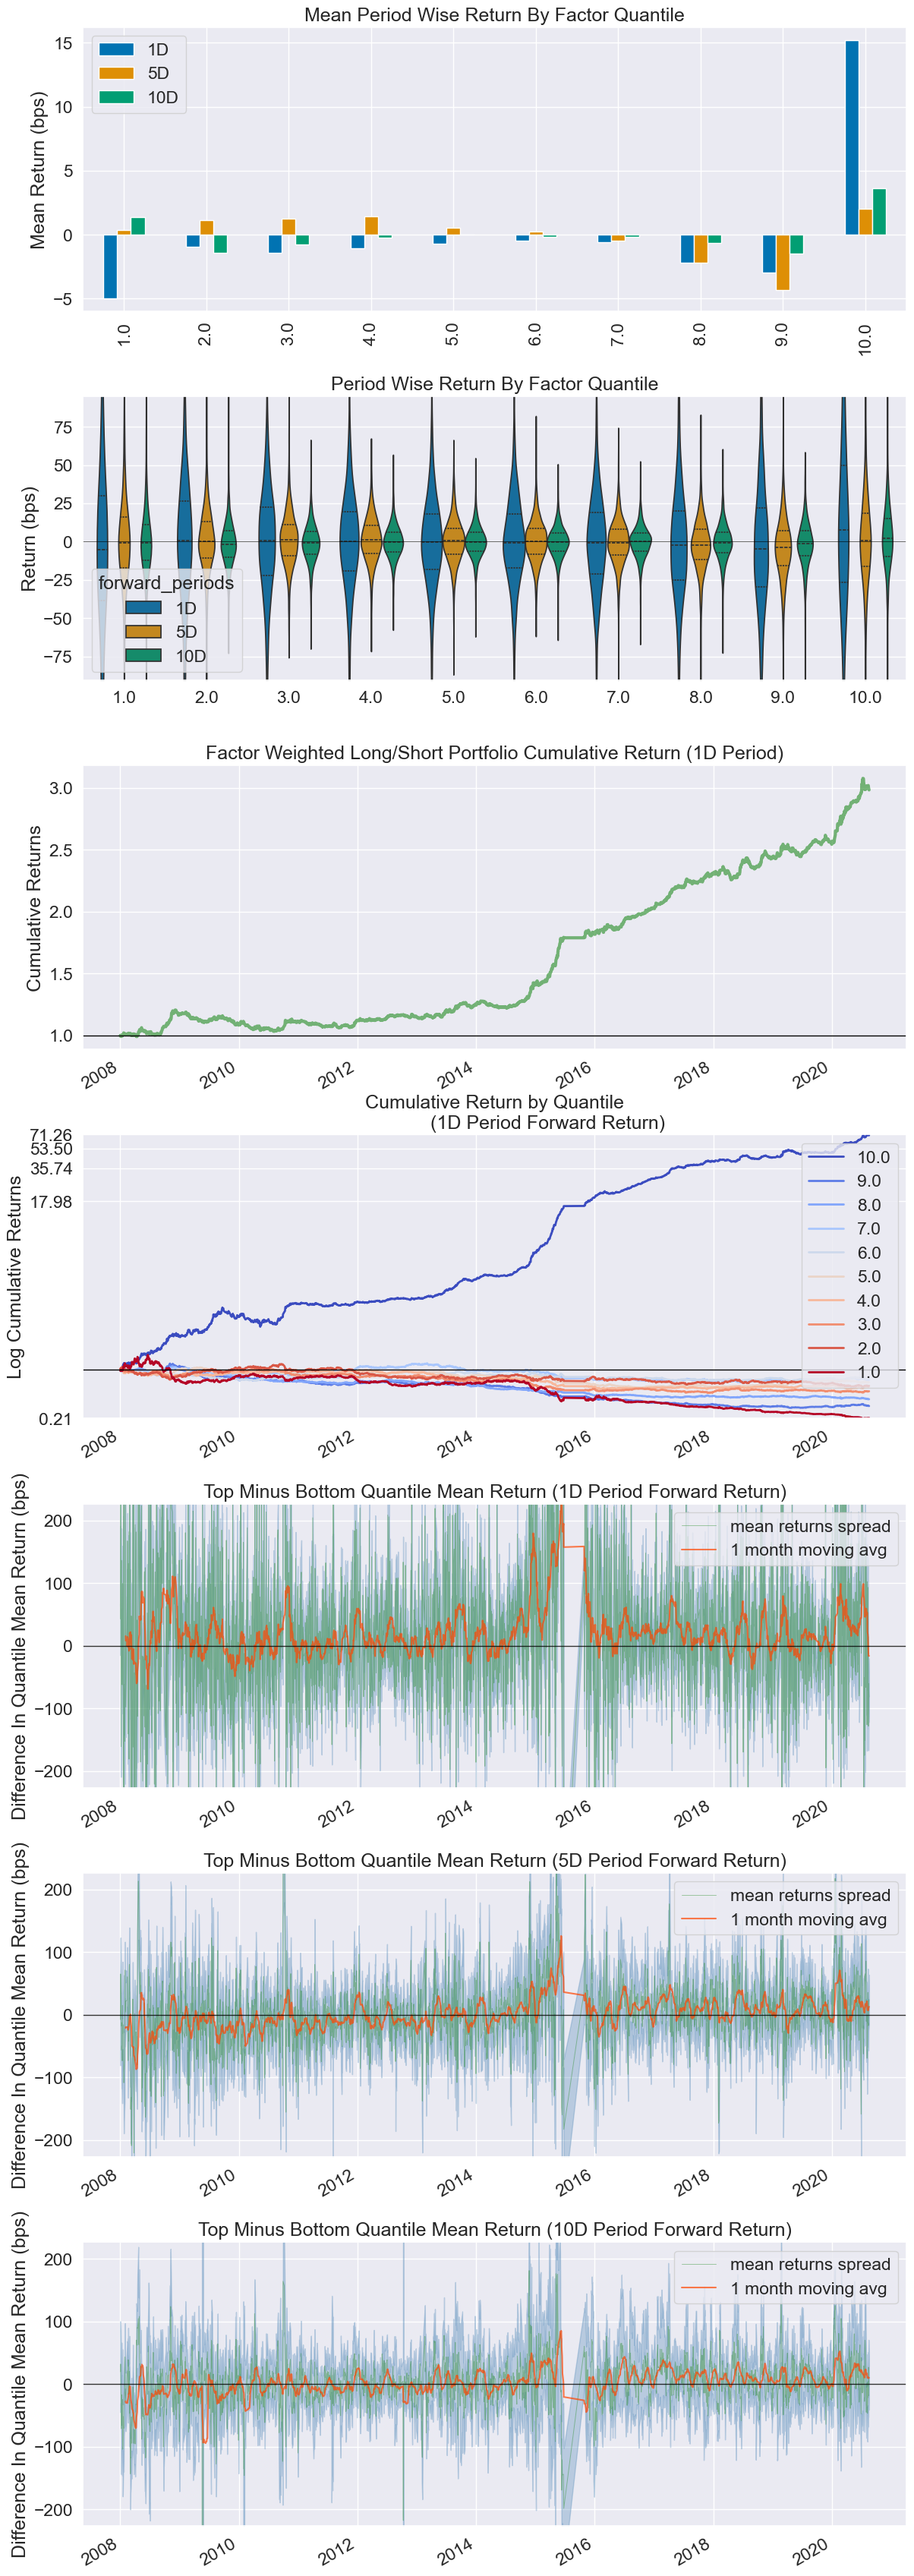

Information Analysis


1D     5D    10D
IC Mean          -0.029 -0.031 -0.005
IC Std.           0.137  0.129  0.128
Risk-Adjusted IC -0.209 -0.237 -0.038
t-stat(IC)          NaN    NaN    NaN
p-value(IC)         NaN    NaN    NaN
IC Skew             NaN    NaN    NaN
IC Kurtosis         NaN    NaN    NaN

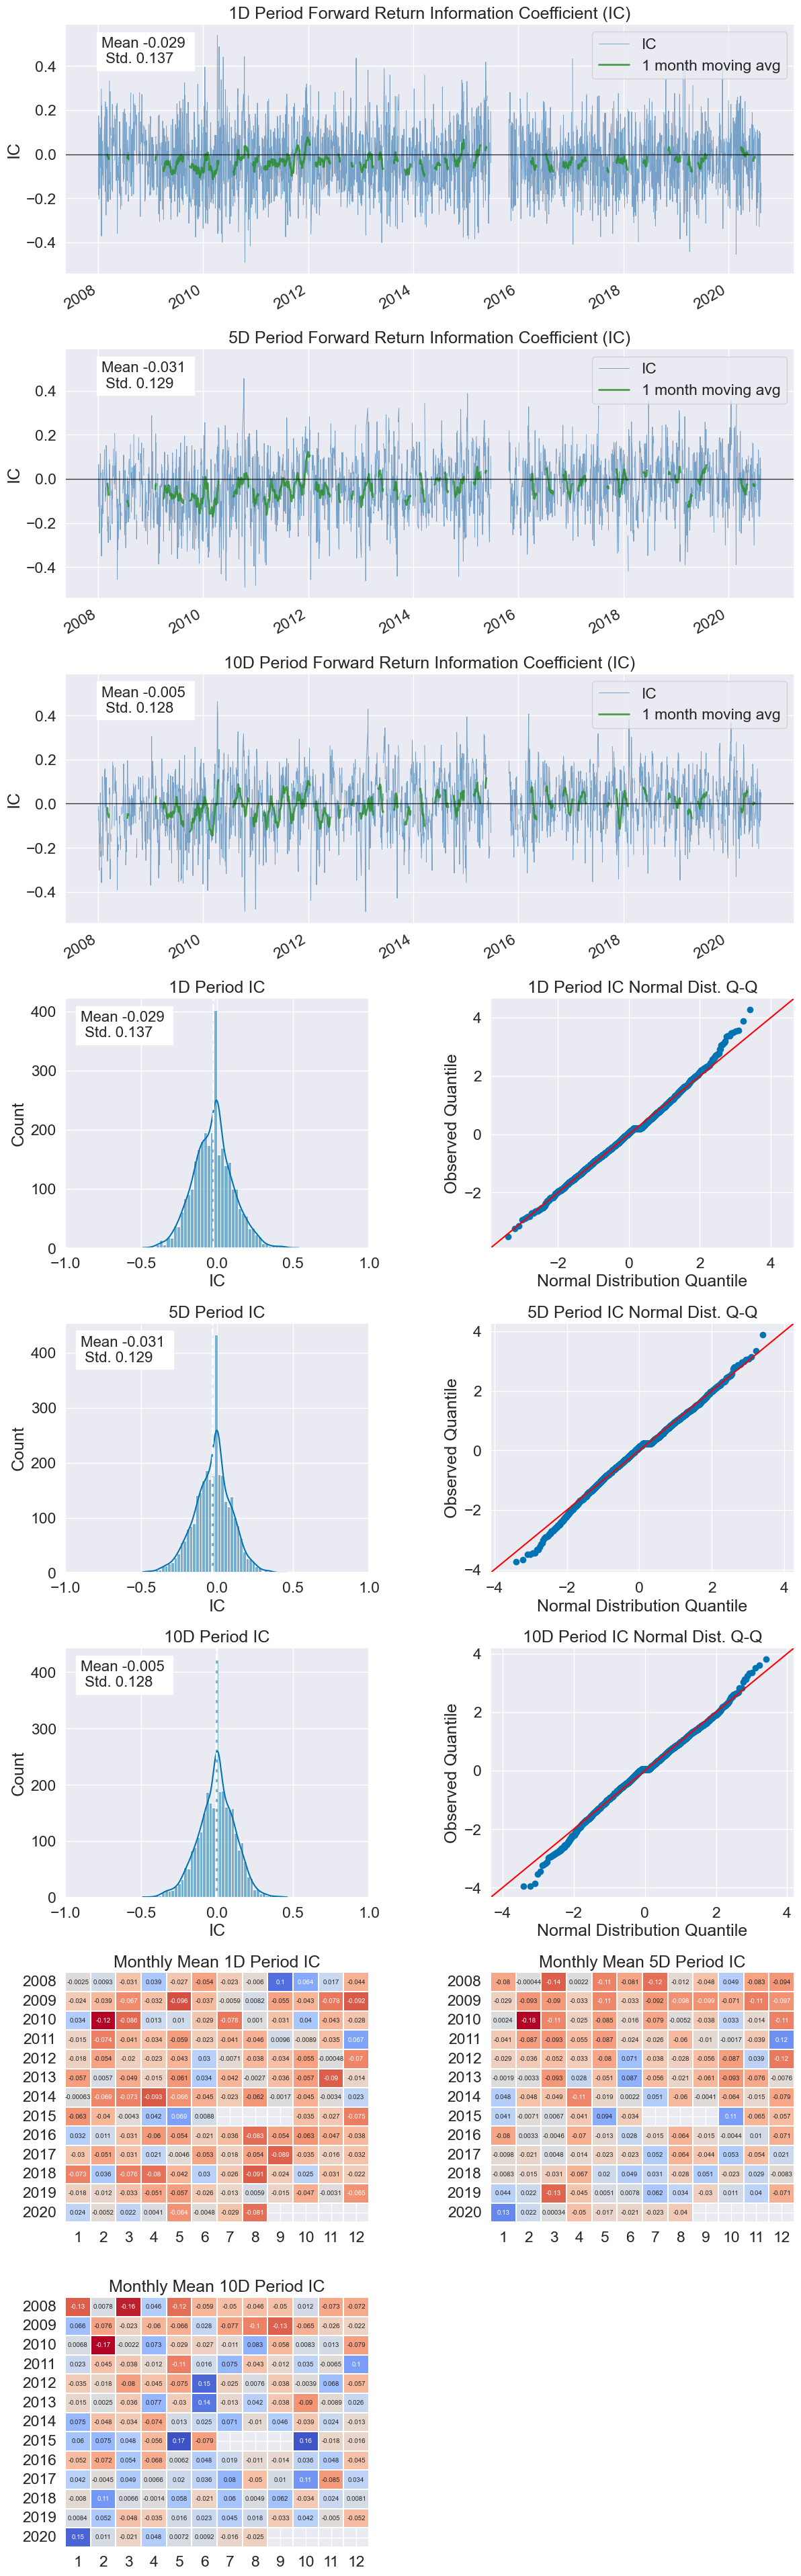

c:\Python313\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1.0 Mean Turnover    0.470  0.660  0.674
Quantile 2.0 Mean Turnover    0.752  0.906  0.892
Quantile 3.0 Mean Turnover    0.818  0.899  0.894
Quantile 4.0 Mean Turnover    0.845  0.894  0.893
Quantile 5.0 Mean Turnover    0.856  0.891  0.893
Quantile 6.0 Mean Turnover    0.860  0.896  0.895
Quantile 7.0 Mean Turnover    0.853  0.897  0.898
Quantile 8.0 Mean Turnover    0.835  0.899  0.896
Quantile 9.0 Mean Turnover    0.794  0.901  0.892
Quantile 10.0 Mean Turnover   0.673  0.893  0.885

1D     5D    10D
Mean Factor Rank Autocorrelation  0.605  0.038  0.083

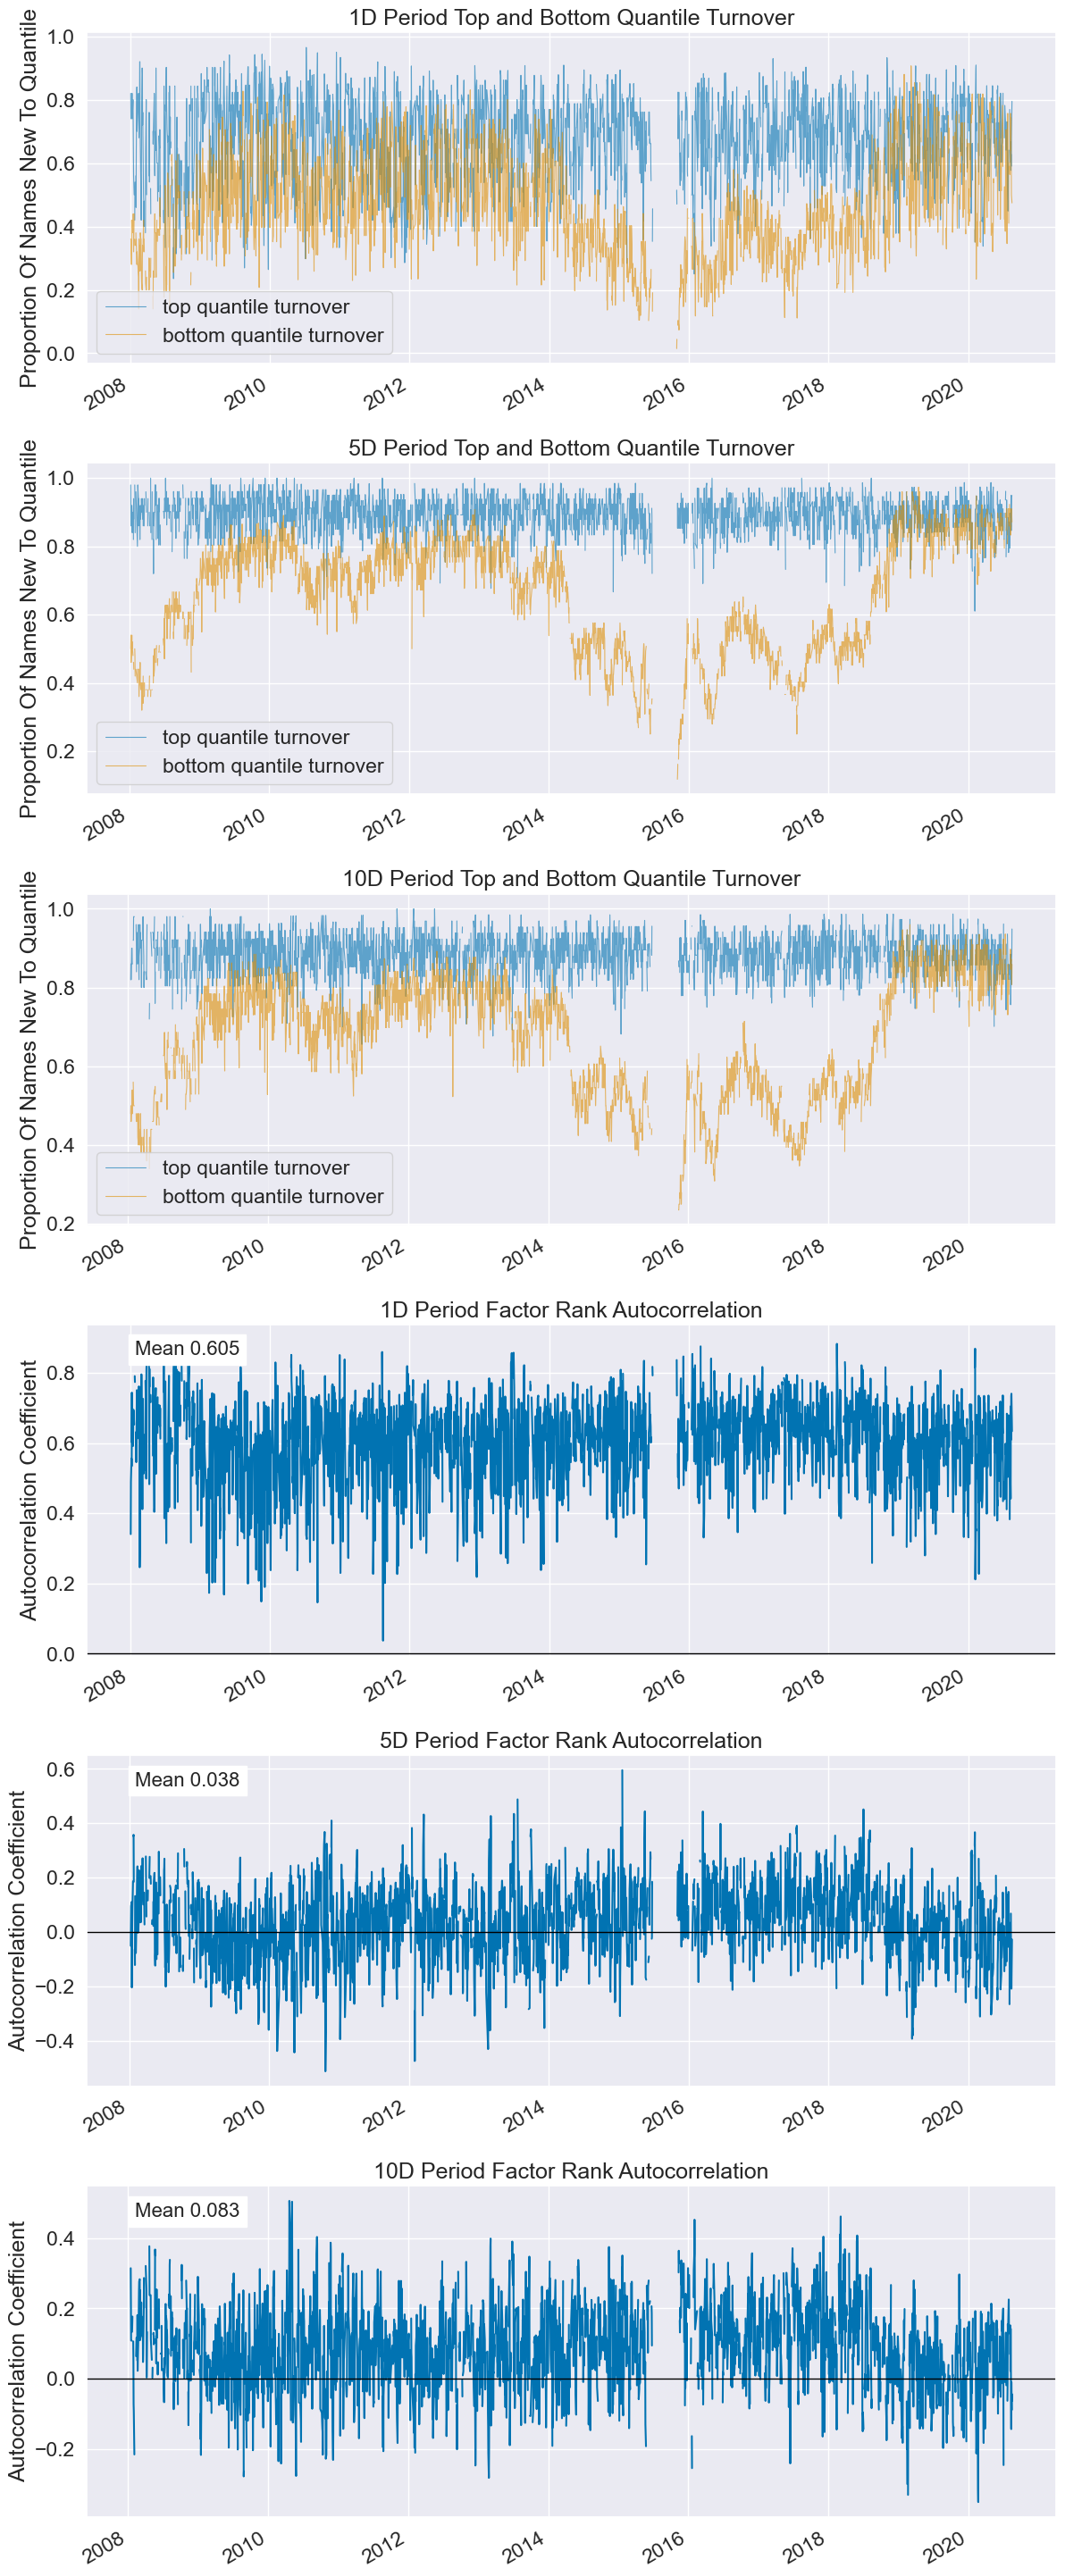

In [25]:
# 特征表现分析
dataset.show_feature_performance("rsv_5")

In [26]:
# 保存到文件缓存
lab.save_dataset(name, dataset)

# 模型训练

In [27]:
# 加载模块
import numpy as np

from vnpy.alpha import Segment, AlphaDataset, AlphaModel

from vnpy.alpha.model.models.lgb_model import LgbModel

In [28]:
# 从文件缓存加载
dataset: AlphaDataset = lab.load_dataset(name)

In [29]:
# 创建模型对象
model: AlphaModel = LgbModel(seed=42)

In [30]:
# 使用数据集训练模型
model.fit(dataset)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.326113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32797
[LightGBM] [Info] Number of data points in the train set: 510579, number of used features: 158
[LightGBM] [Info] Start training from score -0.000000
[1]	train's l2: 0.995334	valid's l2: 0.995644
Training until validation scores don't improve for 50 rounds
[2]	train's l2: 0.994069	valid's l2: 0.994485
[3]	train's l2: 0.993011	valid's l2: 0.99385
[4]	train's l2: 0.991933	valid's l2: 0.993198
[5]	train's l2: 0.991025	valid's l2: 0.99265
[6]	train's l2: 0.990191	valid's l2: 0.992144
[7]	train's l2: 0.989366	valid's l2: 0.991643
[8]	train's l2: 0.988665	valid's l2: 0.991289
[9]	train's l2: 0.988017	valid's l2: 0.991359
[10]	train's l2: 0.987364	valid's l2: 0.991405
[11]	train's l2: 0.986761	valid's l2: 0.991372
[12]	train's l2: 0.986141	valid's l2: 0.9912
[13]	train's l2: 0.985639	valid's l2: 0.99

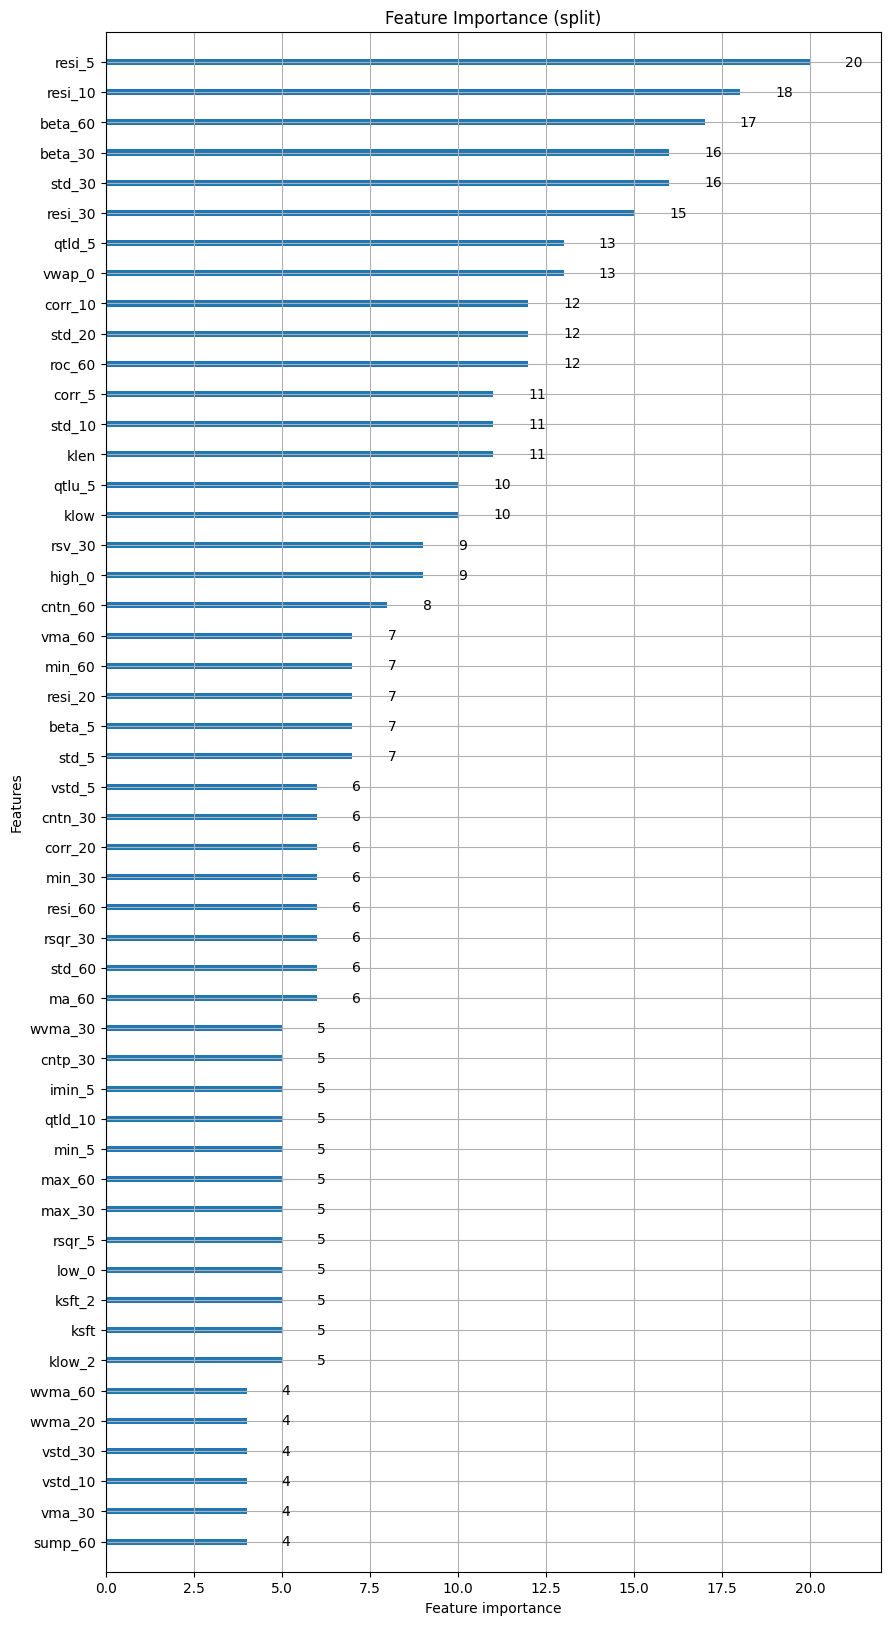

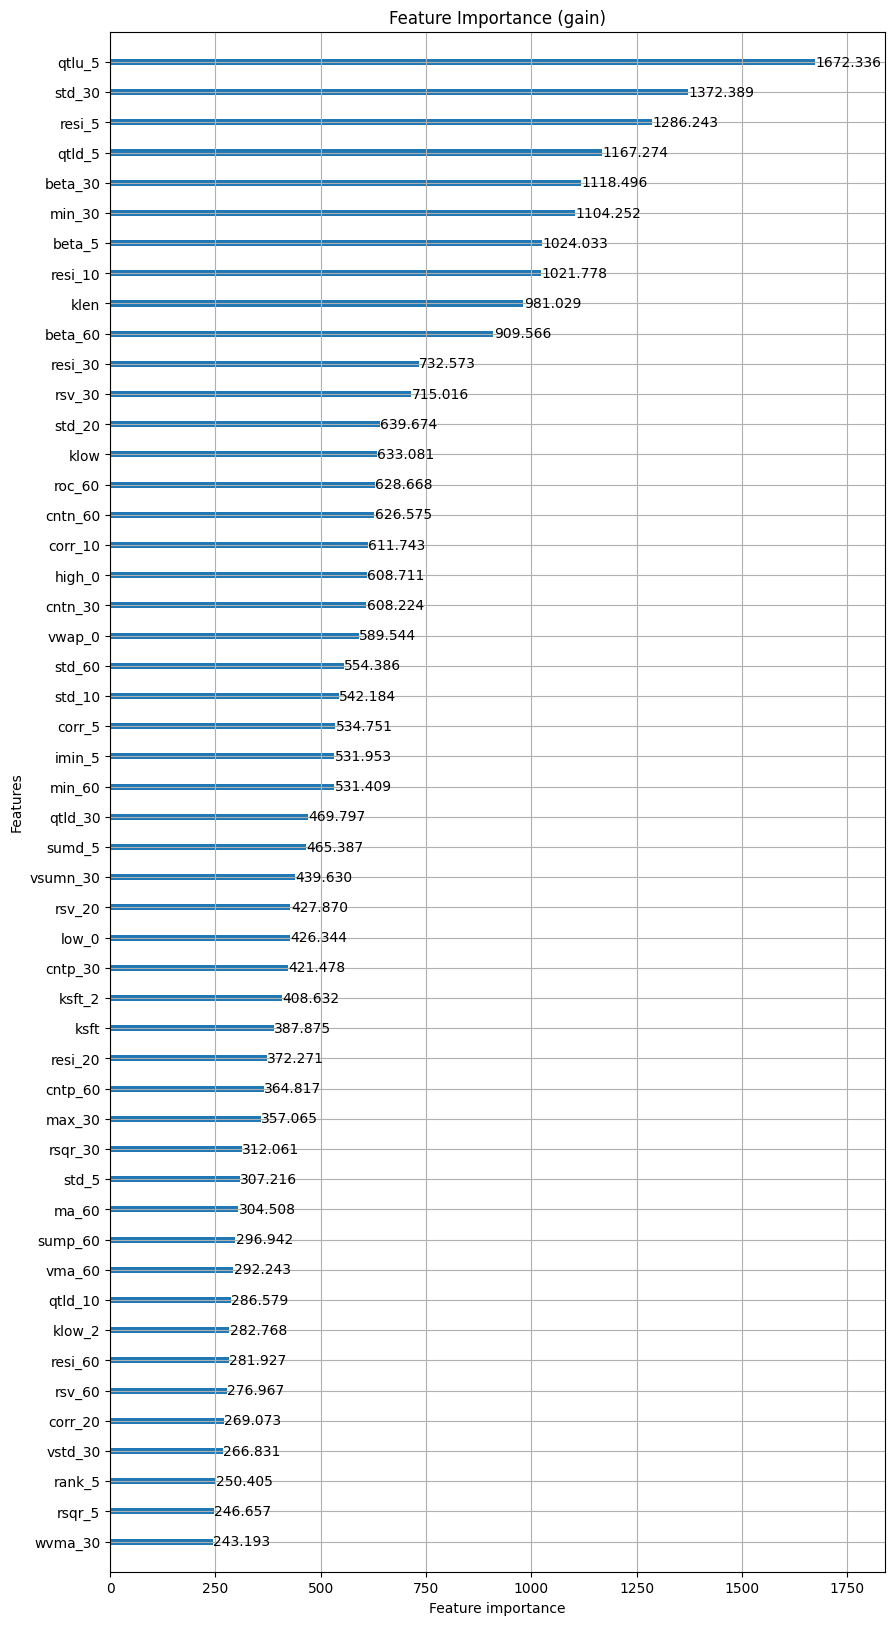

In [31]:
# 查看模型细节
model.detail()

In [32]:
# 保存模型
lab.save_model(name, model)

# 预测信号

In [33]:
model: AlphaModel = lab.load_model(name)

In [34]:
# 用模型在测试集上预测
pre: np.ndarray = model.predict(dataset, Segment.TEST)

# 加载测试集数据
df_t: pl.DataFrame = dataset.fetch_infer(Segment.TEST)

# 合并预测信号列
df_t = df_t.with_columns(pl.Series(pre).alias("signal"))

# 提取信号数据
signal: pl.DataFrame = df_t["datetime", "vt_symbol", "signal"]

Dropped 1.1% entries from factor data: 1.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -2.865719  0.021604 -0.089275  0.107621  26490  10.011338
2               -0.627738  0.050924 -0.046297  0.026353  26450   9.996221
3               -0.492027  0.072083 -0.030380  0.023720  26458   9.999244
4               -0.439727  0.084952 -0.018270  0.023185  26474  10.005291
5               -0.419218  0.105164 -0.007967  0.023008  26482  10.008314
6               -0.347023  0.131507  0.001831  0.021815  26469  10.003401
7               -0.131267  0.146012  0.012079  0.022185  26468  10.003023
8               -0.069368  0.176949  0.024313  0.024519  26416   9.983371
9               -0.035450  0.211112  0.041726  0.027788  26442   9.993197
10              -0.007210  2.496799  0.084561  0.065537  26451   9.996599

Returns Analysis


1D      5D     10D
Ann. alpha                                      0.948   0.407   0.200
beta                                            0.047   0.032   0.015
Mean Period Wise Return Top Quantile (bps)     19.586  11.111   6.336
Mean Period Wise Return Bottom Quantile (bps) -21.039 -10.801  -4.739
Mean Period Wise Spread (bps)                  40.625  21.894  11.048

<Figure size 640x480 with 0 Axes>

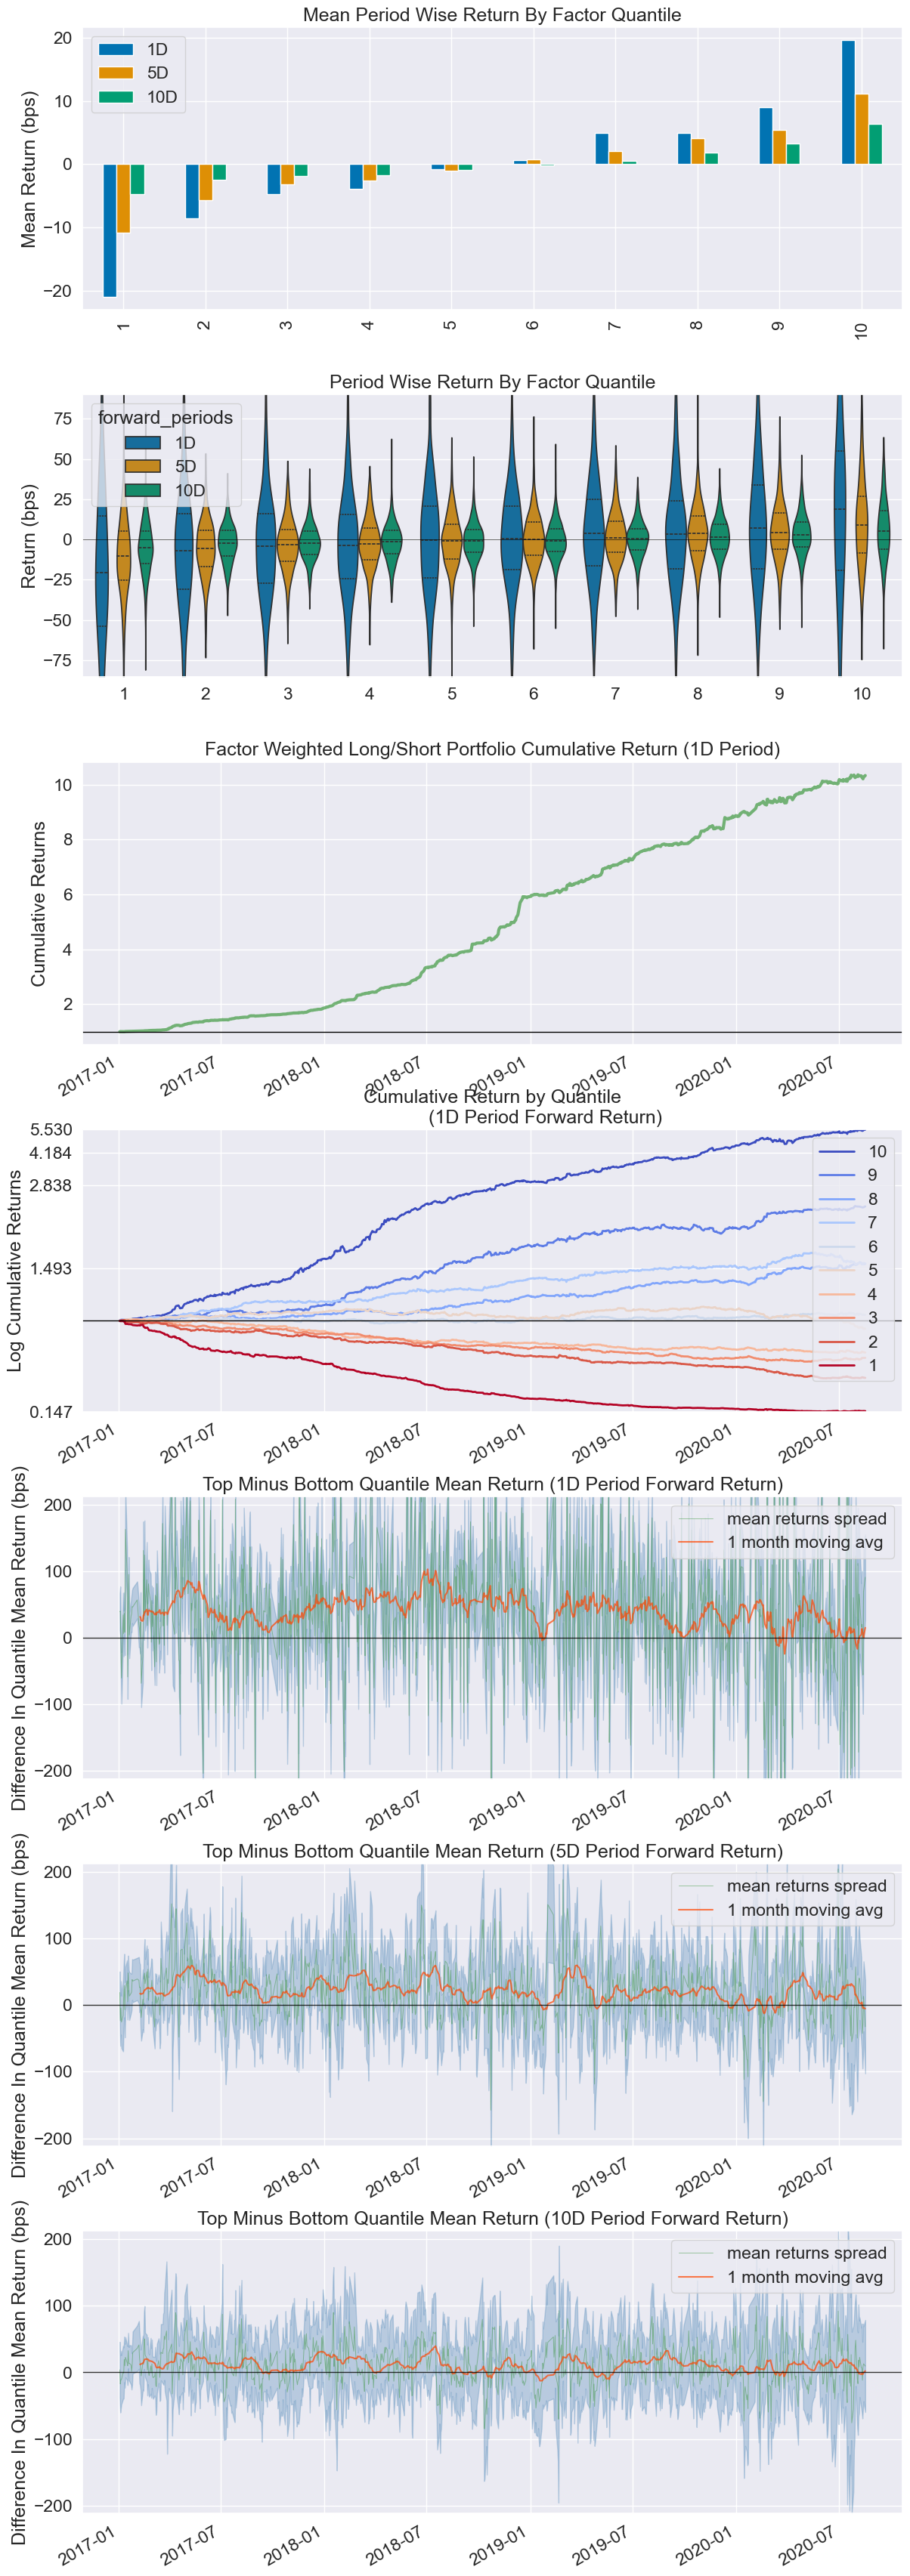

Information Analysis


1D      5D     10D
IC Mean            0.063   0.067   0.047
IC Std.            0.129   0.123   0.113
Risk-Adjusted IC   0.494   0.543   0.412
t-stat(IC)        14.657  16.127  12.236
p-value(IC)        0.000   0.000   0.000
IC Skew            0.207   0.210   0.029
IC Kurtosis        0.646   0.071  -0.104

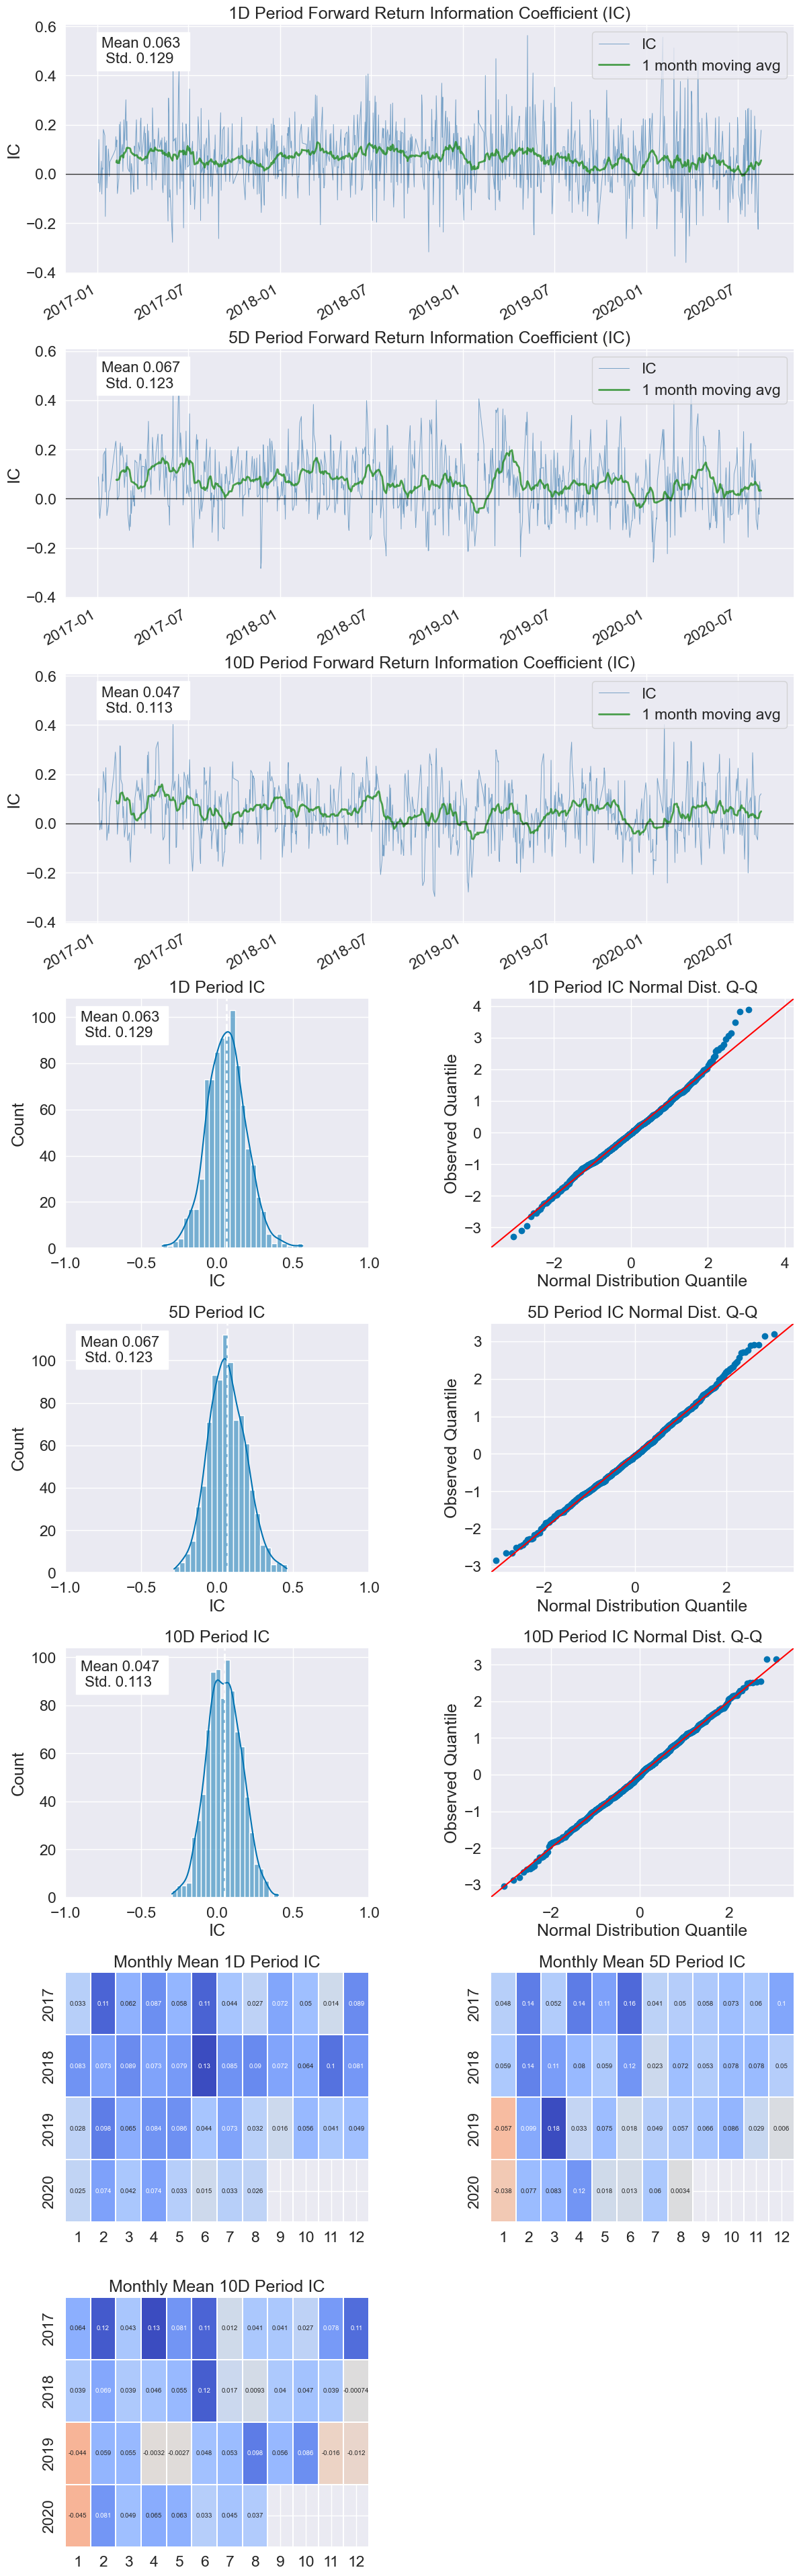

c:\Python313\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover    0.585  0.816  0.842
Quantile 2 Mean Turnover    0.754  0.869  0.881
Quantile 3 Mean Turnover    0.800  0.878  0.886
Quantile 4 Mean Turnover    0.824  0.886  0.895
Quantile 5 Mean Turnover    0.822  0.885  0.890
Quantile 6 Mean Turnover    0.820  0.880  0.884
Quantile 7 Mean Turnover    0.817  0.873  0.882
Quantile 8 Mean Turnover    0.800  0.878  0.888
Quantile 9 Mean Turnover    0.763  0.878  0.885
Quantile 10 Mean Turnover   0.537  0.809  0.828

1D     5D    10D
Mean Factor Rank Autocorrelation  0.563  0.108  0.077

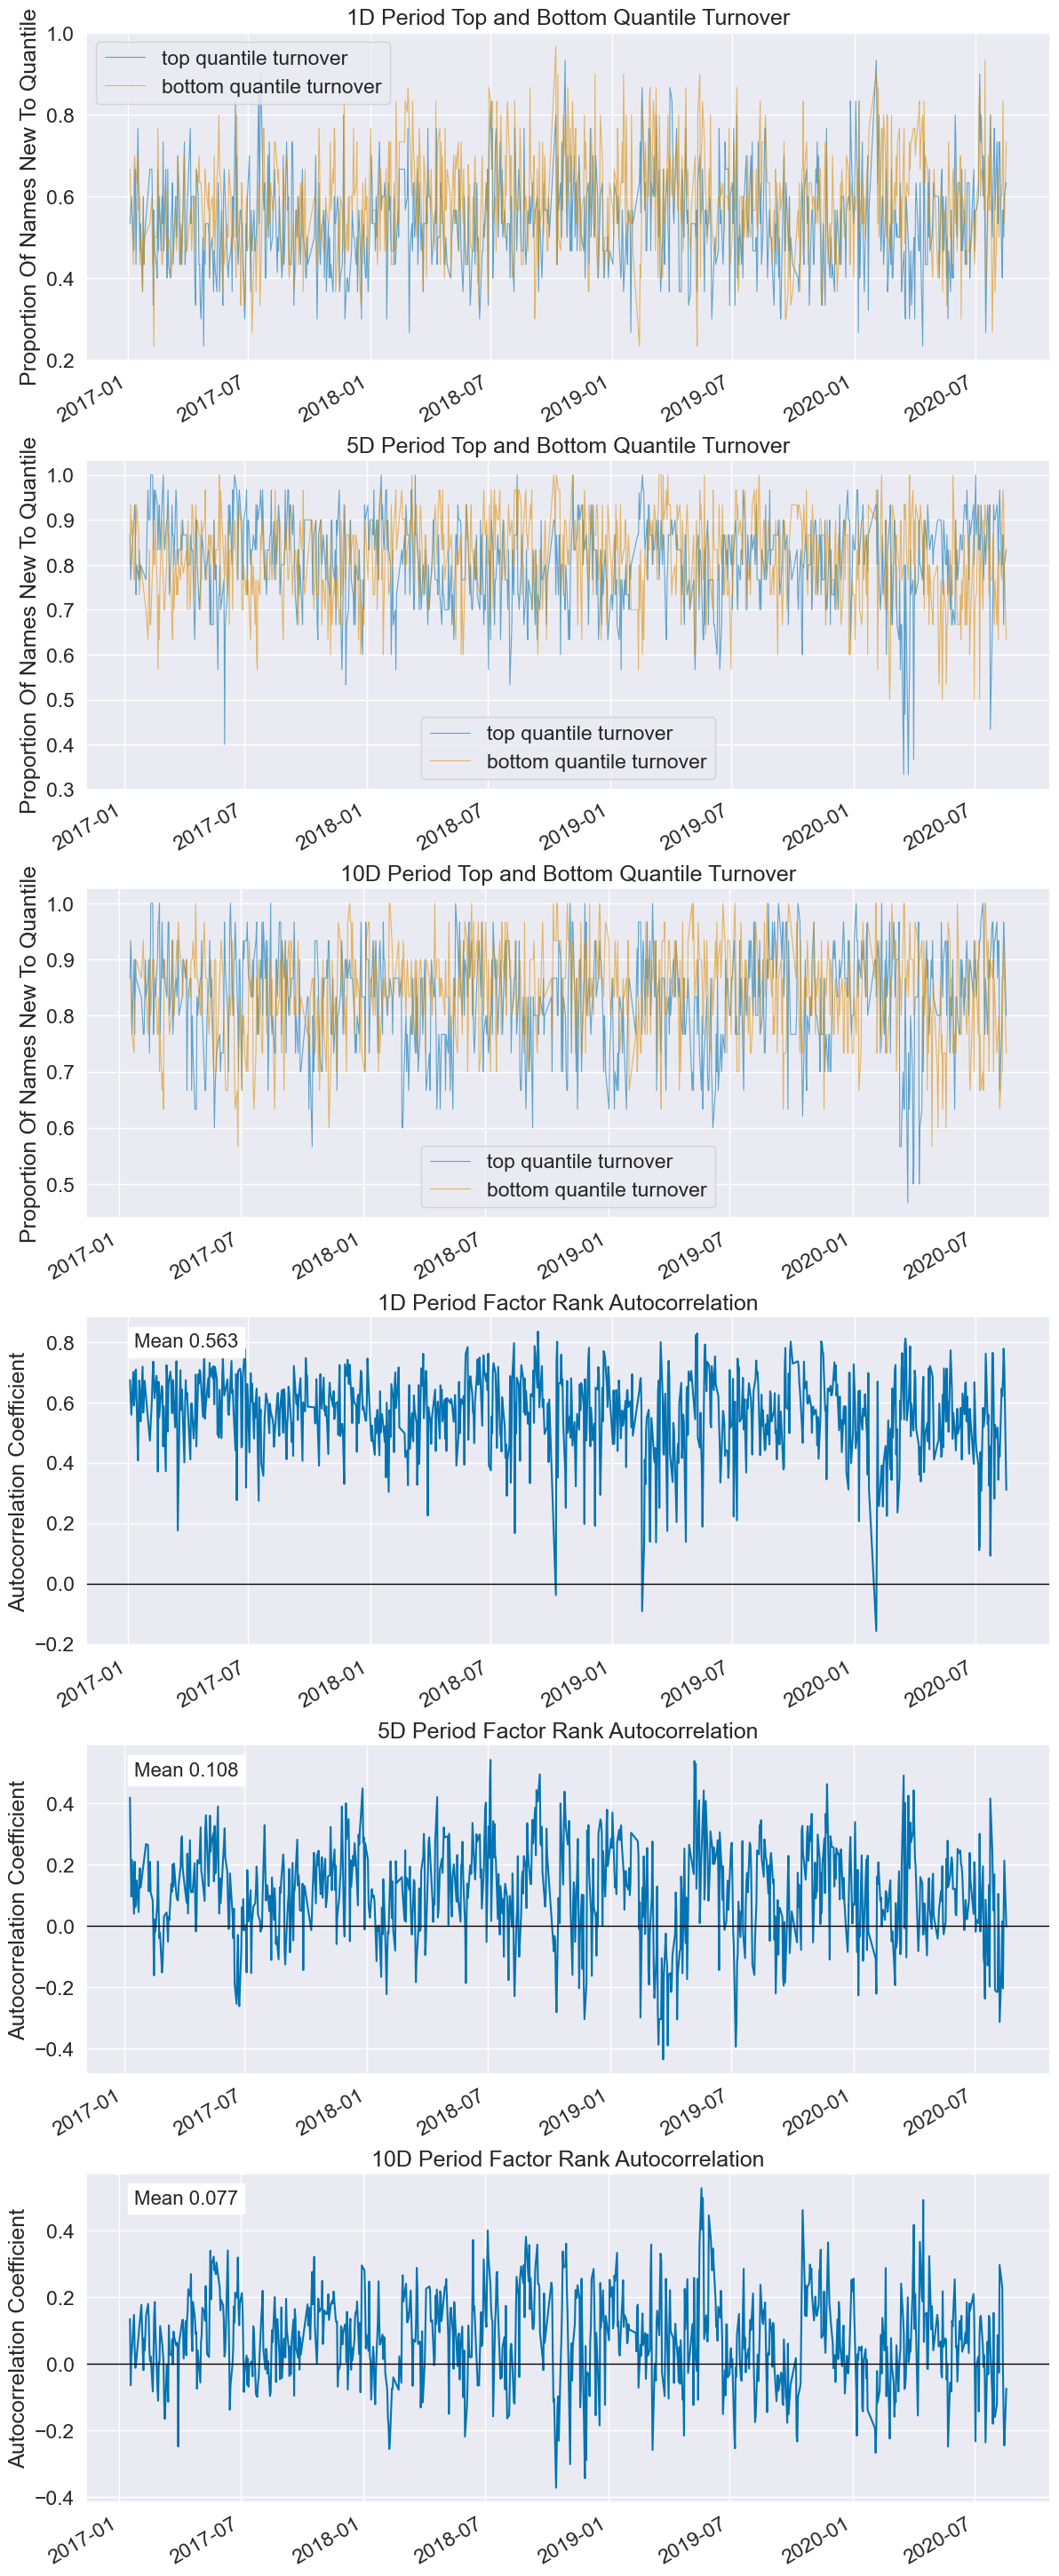

In [35]:
# 检查信号绩效
dataset.show_signal_performance(signal)

In [36]:
# 保存信号数据
lab.save_signal(name, signal)

# 策略回测

In [37]:
# 加载模块
import importlib
from datetime import datetime

from vnpy.alpha.strategy import BacktestingEngine

import vnpy.alpha.strategy.strategies.equity_demo_strategy as equity_demo_strategy

In [38]:
# 重载策略类
importlib.reload(equity_demo_strategy)
EquityDemoStrategy = equity_demo_strategy.EquityDemoStrategy

In [39]:
# 从文件加载信号数据
signal = lab.load_signal(name)

In [40]:
# 创建回测引擎对象
engine = BacktestingEngine(lab)

# 设置回测参数
engine.set_parameters(
    vt_symbols=component_symbols,
    interval=Interval.DAILY,
    start=datetime(2017, 1, 1),
    end=datetime(2020, 8, 1),
    capital=100000000
)

# 添加策略实例
setting = {"top_k": 30, "n_drop": 3, "hold_thresh": 3}
engine.add_strategy(EquityDemoStrategy, setting, signal)

In [41]:
# 执行回测任务
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2025-03-26 22:55:17 开始加载历史数据


100%|██████████| 819/819 [00:05<00:00, 155.25it/s]

2025-03-26 22:55:23 部分合约历史数据为空：['600001.SSE', '601059.SSE', '688065.SSE', '300866.SZSE', '605499.SSE', '300888.SZSE', '600786.SSE', '601825.SSE', '601868.SSE', '000562.SZSE', '688041.SSE', '600591.SSE', '000527.SZSE', '600832.SSE', '000024.SZSE', '605117.SSE', '001289.SZSE', '600357.SSE', '600087.SSE', '600938.SSE', '601268.SSE', '601299.SSE', '300999.SZSE', '300979.SZSE', '688271.SSE', '300957.SZSE', '601995.SSE', '301269.SZSE', '300919.SZSE', '688223.SSE', '600905.SSE', '600941.SSE', '600102.SSE', '600631.SSE', '300896.SZSE', '688303.SSE', '688187.SSE', '601728.SSE']
2025-03-26 22:55:23 所有历史数据加载完成
2025-03-26 22:55:23 策略初始化完成
2025-03-26 22:55:23 开始回放历史数据


2025-03-26 22:55:27 历史数据回放结束
2025-03-26 22:55:27 开始计算逐日盯市盈亏
2025-03-26 22:55:27 逐日盯市盈亏计算完成
2025-03-26 22:55:27 开始计算策略统计指标
2025-03-26 22:55:27 ------------------------------
2025-03-26 22:55:27 首个交易日：  2017-01-03
2025-03-26 22:55:27 最后交易日：  2020-07-31
2025-03-26 22:55:27 总交易日：  871
2025-03-26 22:55:27 盈利交易日：  474
2025-03-26 22:55:27 亏损交易日：  396
2025-03-26 22:55:27 起始资金：  100,000,000.00
2025-03-26 22:55:27 结束资金：  281,492,949.01
2025-03-26 22:55:27 总收益率：  181.49%
2025-03-26 22:55:27 年化收益：  50.01%
2025-03-26 22:55:27 最大回撤:   -46,585,827.60
2025-03-26 22:55:27 百分比最大回撤: -23.22%
2025-03-26 22:55:27 最长回撤天数:   27
2025-03-26 22:55:27 总盈亏：  181,492,949.01
2025-03-26 22:55:27 总手续费：  19,240,820.57
2025-03-26 22:55:27 总成交金额：  25,680,978,346.93
2025-03-26 22:55:27 总成交笔数：  4625
2025-03-26 22:55:27 日均盈亏：  208,373.08
2025-03-26 22:55:27 日均手续费：  22,090.49
2025-03-26 22:55:27 日均成交金额：  29,484,475.71
2025-03-26 22:55:27 日均成交笔数：  5.309988518943743
2025-03-26 22:55:27 日均收益率：  0.13%
2025-03-26 22:55:27 收益标准差： 

In [42]:
# 显示超额收益分析结果
engine.show_performance(benchmark_symbol=index_symbol)